No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


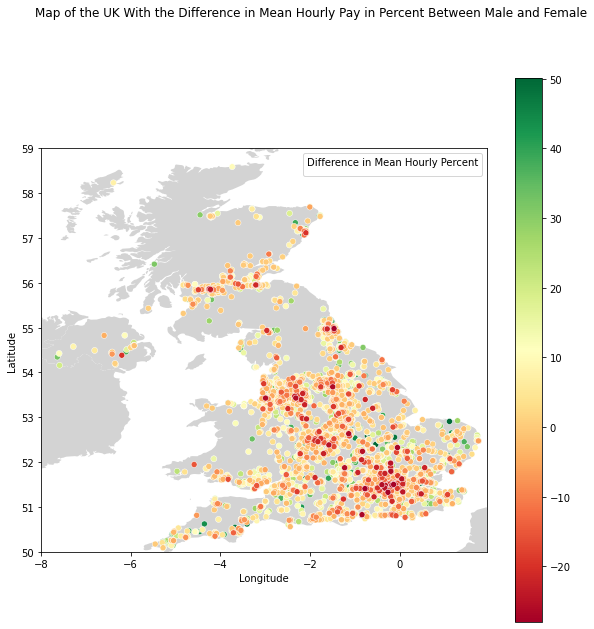

In [191]:
# Check UK Gender Pay Gap in the UK
# Datasets from:
# https://www.gov.uk/government/stat
# https://simplemaps.com/data/gb-cities
# https://www.freemaptools.com/download-uk-postcode-lat-lng.htm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Read the data.
df = pd.read_csv('uk-pay-gap.csv')
post_code_to_coordinates = pd.read_csv('ukpostcodes.csv')
city_to_coordinates = pd.read_csv('worldcities.csv')
city_to_coordinates_uk = city_to_coordinates[city_to_coordinates['country'] == 'United Kingdom']

# Extract area code from postcode.
grouped = df.groupby(df['PostCode'])
data = grouped['DiffMeanHourlyPercent'].mean().sort_values(ascending=False)
data_filtered = data[data.index.isin(post_code_to_coordinates['PostCode'])]

# Merge data to get region name and coordinates.
df_coordinates = data_filtered.to_frame().merge(post_code_to_coordinates, on='PostCode')

# Calculate quantiles and IQR.
Q1 = df_coordinates['DiffMeanHourlyPercent'].quantile(0.25)
Q3 = df_coordinates['DiffMeanHourlyPercent'].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_coordinates['DiffMeanHourlyPercent'] < (Q1 - 1.5 * IQR)) | (df_coordinates['DiffMeanHourlyPercent'] > (Q3 + 1.5 * IQR)))

# Filter our dataframe based on condition.
df_coordinates = df_coordinates[condition]

# Plot the data and country map.
fig, ax = plt.subplots(figsize=(10, 10))
countries = gpd.read_file('zip://./ukmap.zip').plot(color='lightgrey', ax=ax)
plot = sns.scatterplot(x = 'longitude', y = 'latitude', data = df_coordinates, hue = 'DiffMeanHourlyPercent', palette = 'RdYlGn', ax = ax, legend = False)
plot.legend()
fig.suptitle('Map of the UK With the Difference in Mean Hourly Pay in Percent Between Male and Female')
plot.set_xlabel('Longitude')
plot.set_ylabel('Latitude')
plot.legend(title = 'Difference in Mean Hourly Percent')
plot.set_xlim(-8, 1.95)
plot.set_ylim(50, 59)

norm = plt.Normalize(df_coordinates['DiffMeanHourlyPercent'].min(), df_coordinates['DiffMeanHourlyPercent'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)

In [167]:
summary_stats = df_coordinates[['DiffMeanHourlyPercent']].describe() \
                                                         .transpose() \
                                                         .rename({'DiffMeanHourlyPercent': 'Difference in Mean Hourly Pay in Percent'})
summary_stats # After removing outliers.

,count,mean,std,min,25%,50%,75%,max
Difference in Mean Hourly Pay in Percent,7300.0,14.010106,11.75486,-19.5,5.7,13.4,22.0,47.5
